In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import networkx as nx
import pickle
import time
import matplotlib.pyplot as plt


In [ ]:
interactions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bigger/interactions_bigger.csv')
playlist_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bigger/playlist_data_bigger.csv')
song_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bigger/song_data_bigger.csv')
with open("/content/drive/MyDrive/Colab Notebooks/dataset/bigger/bigger_graph.pickle", "rb") as f:
    larger_graph = pickle.load(f)
with open("/content/drive/MyDrive/Colab Notebooks/dataset/bigger/enriched_graph.pickle", "rb") as f:
    enriched_larger_graph = pickle.load(f)

In [ ]:
client_id = '1110164b628840e29ee44ea43b10f1e2'
client_secret = '1206b4d665aa4d828e3b852c284bbfca'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
# # Example URI of a song
song_uri = 'spotify:track:6rqhFgbbKwnb9MLmUQDhG6'

track_info = sp.audio_features('spotify:track:6rqhFgbbKwnb9MLmUQDhG6')
# # Get audio features for the song
# audio_features = sp.audio_features(tracks=[song_uri])

# # Print the available attributes
# print("Available attributes:", list(audio_features[0].keys()))
print(track_info)

[{'danceability': 0.592, 'energy': 0.0196, 'key': 1, 'loudness': -33.35, 'mode': 1, 'speechiness': 0.0358, 'acousticness': 0.362, 'instrumentalness': 0.854, 'liveness': 0.108, 'valence': 0.0312, 'tempo': 119.504, 'type': 'audio_features', 'id': '6rqhFgbbKwnb9MLmUQDhG6', 'uri': 'spotify:track:6rqhFgbbKwnb9MLmUQDhG6', 'track_href': 'https://api.spotify.com/v1/tracks/6rqhFgbbKwnb9MLmUQDhG6', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6rqhFgbbKwnb9MLmUQDhG6', 'duration_ms': 65314, 'time_signature': 4}]


In [ ]:
# # Load the larger graph
# with open("/content/drive/MyDrive/Colab Notebooks/dataset/bigger/bigger_graph.pickle", "rb") as f:
#     larger_graph = pickle.load(f)

# # Function to retrieve Spotify attributes for a batch of songs
# def get_spotify_attributes_batch(song_uris):
#     # Initialize Spotify client

#     batch_attributes = []

#     # Process songs in batches
#     for i in range(0, len(song_uris), 100):
#         batch_song_uris = song_uris[i:i+100]

#         # Retrieve track features for the batch
#         track_features_batch = sp.audio_features(batch_song_uris)

#         # Append track features to batch attributes
#         batch_attributes.extend(track_features_batch)

#         # Wait for the specified interval
#         time.sleep(30)

#     return batch_attributes

# # Function to retrieve Spotify attributes for a single song
# def get_spotify_attributes(song_uri):
#     # Initialize Spotify client
#     client_credentials_manager = SpotifyClientCredentials()
#     sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#     # Retrieve track features
#     track_features = sp.audio_features(song_uri)[0]

#     return track_features

# # Enrich nodes in the graph with Spotify attributes
# def enrich_graph_with_spotify_attributes(graph):
#     # Retrieve song URIs from graph nodes
#     song_uris = list(graph.nodes())

#     # Retrieve Spotify attributes for the batch of songs
#     batch_attributes = get_spotify_attributes_batch(song_uris)

#     # Add Spotify attributes to graph nodes
#     for song_uri, attributes in zip(song_uris, batch_attributes):
#         graph.nodes[song_uri].update(attributes)

# # Enrich the larger graph with Spotify attributes
# enrich_graph_with_spotify_attributes(larger_graph)
# # Save the enriched graph to a pickle file
# with open("/content/drive/MyDrive/Colab Notebooks/dataset/bigger/enriched_graph.pickle", "wb") as f:
#     pickle.dump(larger_graph, f)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_audio_features(graph):
    # Initialize a list to store the data
    features_list = []

    # Extract features for each song
    for node_id, attributes in graph.nodes(data=True):
        # Append the attribute dict to the list
        features_list.append(attributes)

    # Create a DataFrame from the list of feature dictionaries
    features_df = pd.DataFrame(features_list)

    return features_df

# Load your graph (this code assumes you have the graph 'larger_graph' already loaded)
# larger_graph = ... (loading graph code as you have it)

# Extract audio features into a DataFrame
audio_features_df = extract_audio_features(enriched_larger_graph)

# Optional: drop non-numeric columns if present
audio_features_df = audio_features_df.select_dtypes(include=[np.number])

# Display the first few rows of the DataFrame
audio_features_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.748,0.627,7,-6.029,1,0.0639,0.131,0.0,0.0852,0.524,120.963,188491,4
1,0.876,0.669,11,-6.054,0,0.1380,0.163,0.0,0.1850,0.682,124.007,213947,4
2,0.625,0.707,2,-4.761,1,0.0337,0.220,0.0,0.2130,0.479,138.064,248156,4
3,0.780,0.575,1,-5.628,0,0.1390,0.106,0.0,0.1290,0.273,81.502,222360,4
4,0.679,0.634,5,-5.024,0,0.0654,0.232,0.0,0.1150,0.498,102.013,210091,4


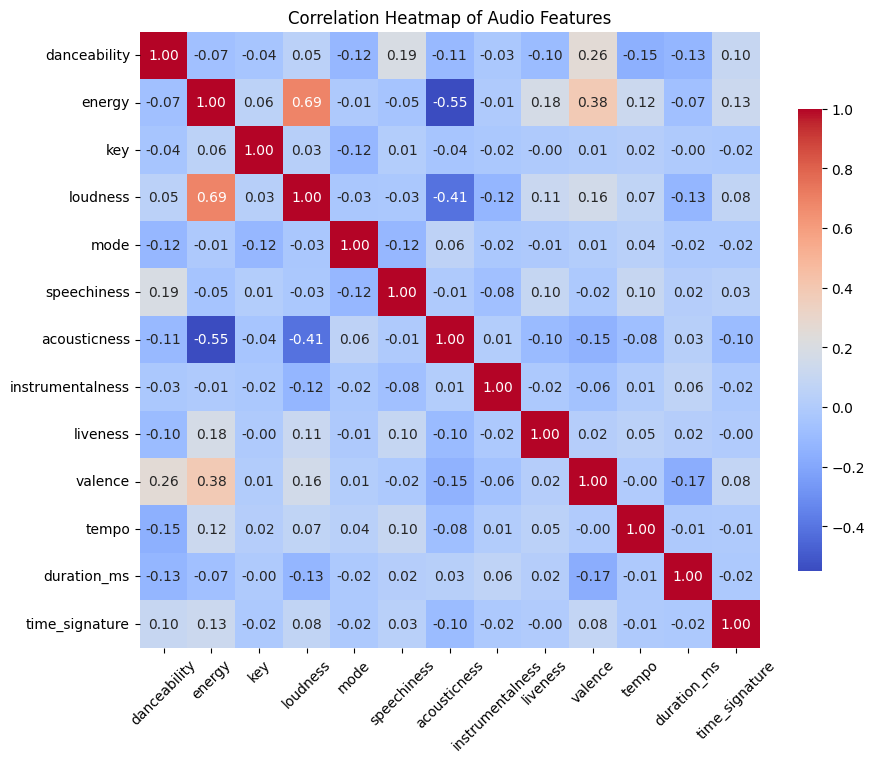

In [ ]:
def plot_correlation_heatmap(df):
    # Calculate the correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns,
                cbar_kws={"shrink": .75})

    plt.title('Correlation Heatmap of Audio Features')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Plotting the heatmap
plot_correlation_heatmap(audio_features_df)

In [ ]:
degree_centrality = nx.degree_centrality(larger_graph)
highest_degree_node = max(degree_centrality, key=degree_centrality.get)
lowest_degree_node = min(degree_centrality, key=degree_centrality.get)
# Retrieve song names corresponding to highest and lowest degree centrality nodes
highest_degree_song_name = song_data[song_data['song_id'] == highest_degree_node]['song_name'].iloc[0]
lowest_degree_song_name = song_data[song_data['song_id'] == lowest_degree_node]['song_name'].iloc[0]

In [ ]:
def recommend_songs(song_uri, graph, song_data, num_recommendations=10):
    # Check if the song URI is in the graph
    if song_uri not in graph.nodes:
        return "Song URI not found in the dataset."

    # Define the features to be used
    features_to_use = ['danceability', 'energy', 'valence', 'instrumentalness', 'acousticness', 'tempo']

    # Extract the feature data for the input song
    input_features = np.array([graph.nodes[song_uri][feature] for feature in features_to_use]).reshape(1, -1)

    # Create a DataFrame to store features of all songs
    songs_features = pd.DataFrame.from_dict({song: [graph.nodes[song][feature] for feature in features_to_use] for song in graph.nodes}, orient='index', columns=features_to_use)

    # Standardize the features since they're on different scales
    scaler = StandardScaler()
    songs_features_scaled = scaler.fit_transform(songs_features)
    input_features_scaled = scaler.transform(input_features)

    # Compute cosine similarity between the input song features and all other songs
    similarity_scores = cosine_similarity(input_features_scaled, songs_features_scaled).flatten()

    # Get the song ids, names, and similarity scores in a DataFrame
    similarity_df = pd.DataFrame({
        'song_id': songs_features.index,
        'similarity_score': similarity_scores
    }).sort_values(by='similarity_score', ascending=False).head(num_recommendations+1)

    # Merge with song names and remove the input song from the recommendations
    top_recommendations = similarity_df.merge(song_data[['song_id', 'song_name']], on='song_id').loc[lambda df: df['song_id'] != song_uri].head(num_recommendations)

    return top_recommendations

In [ ]:
import random
# Extract edge weights from the graph
edge_weights = nx.get_edge_attributes(larger_graph, 'weight')

# Normalize edge weights to obtain popularity scores
max_weight = max(edge_weights.values())
popularity_scores = {song: weight / max_weight for (song, weight) in edge_weights.items()}

import random

def graph_recommend_songs(graph, start_song, num_recommendations, steps, popularity_scores):
    current_song = start_song
    recommended_songs = {}

    for _ in range(num_recommendations):
        neighbors = list(graph.neighbors(current_song))
        neighbor_properties = {neighbor: {'name': song_data.loc[song_data['song_id'] == neighbor, 'song_name'].iloc[0],'weight': graph[current_song][neighbor]['weight'], 'common_playlists': graph[current_song][neighbor]['common_playlists']} for neighbor in neighbors}

        # Adjust popularity scores to ensure they are greater than zero
        neighbor_scores = [max(popularity_scores.get(neighbor, 0), 0.01) for neighbor in neighbors]

        # Select the next song based on popularity scores
        next_song = random.choices(neighbors, weights=neighbor_scores)[0]
        recommended_songs[next_song] = neighbor_properties[next_song]
        current_song = next_song

    return recommended_songs

# Example usage
num_recommendations = 10
num_steps = 3
input_song_name = highest_degree_song_name
co_high_recommended_songs = graph_recommend_songs(larger_graph, highest_degree_node, num_recommendations, num_steps, popularity_scores)
print("Recommended songs based on random walk for input song '{}':".format(input_song_name))
for song_id, properties in co_high_recommended_songs.items():
    print("Song ID:", properties['name'])
    print("Edge Weight:", properties['weight'])
    print("Common Playlists:", properties['common_playlists'])
    print()


Recommended songs based on random walk for input song 'One Dance':
Song ID: Fireball
Edge Weight: 2
Common Playlists: [2027, 2977]

Song ID: Bailando - Spanish Version
Edge Weight: 3
Common Playlists: [2027, 2417, 2977]

Song ID: Highway to Hell
Edge Weight: 1
Common Playlists: [2158]

Song ID: Shake It Off
Edge Weight: 1
Common Playlists: [2158]

Song ID: When the Sun Goes Down
Edge Weight: 1
Common Playlists: [3973]

Song ID: Mama Said
Edge Weight: 1
Common Playlists: [3973]

Song ID: Take Me Out
Edge Weight: 1
Common Playlists: [3973]

Song ID: First
Edge Weight: 2
Common Playlists: [1233, 3973]

Song ID: You Give Love A Bad Name
Edge Weight: 1
Common Playlists: [1473]

Song ID: Drift Away
Edge Weight: 1
Common Playlists: [1072]



In [ ]:
num_recommendations = 10
num_steps = 3
input_song_name = lowest_degree_song_name
co_low_recommended_songs = graph_recommend_songs(larger_graph, lowest_degree_node, num_recommendations, num_steps, popularity_scores)
print("Recommended songs based on random walk for input song '{}':".format(input_song_name))
for song_id, properties in co_low_recommended_songs.items():
    print("Song ID:", properties['name'])
    print("Edge Weight:", properties['weight'])
    print("Common Playlists:", properties['common_playlists'])
    print()

Recommended songs based on random walk for input song 'Angels':
Song ID: All I Want
Edge Weight: 1
Common Playlists: [3472]

Song ID: Drive
Edge Weight: 1
Common Playlists: [1335]

Song ID: Losin Control
Edge Weight: 1
Common Playlists: [2373]

Song ID: Relationship (feat. Future)
Edge Weight: 1
Common Playlists: [1635]

Song ID: Aston Martin Music
Edge Weight: 1
Common Playlists: [1691]

Song ID: Erase Me - Main
Edge Weight: 2
Common Playlists: [1691, 2540]

Song ID: She Knows
Edge Weight: 1
Common Playlists: [2605]

Song ID: IV. sweatpants
Edge Weight: 1
Common Playlists: [2605]

Song ID: Heartbeat
Edge Weight: 2
Common Playlists: [1975, 2540]

Song ID: Jumpin', Jumpin'
Edge Weight: 2
Common Playlists: [1975, 2121]



<ipython-input-13-79afc6e54361>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight')


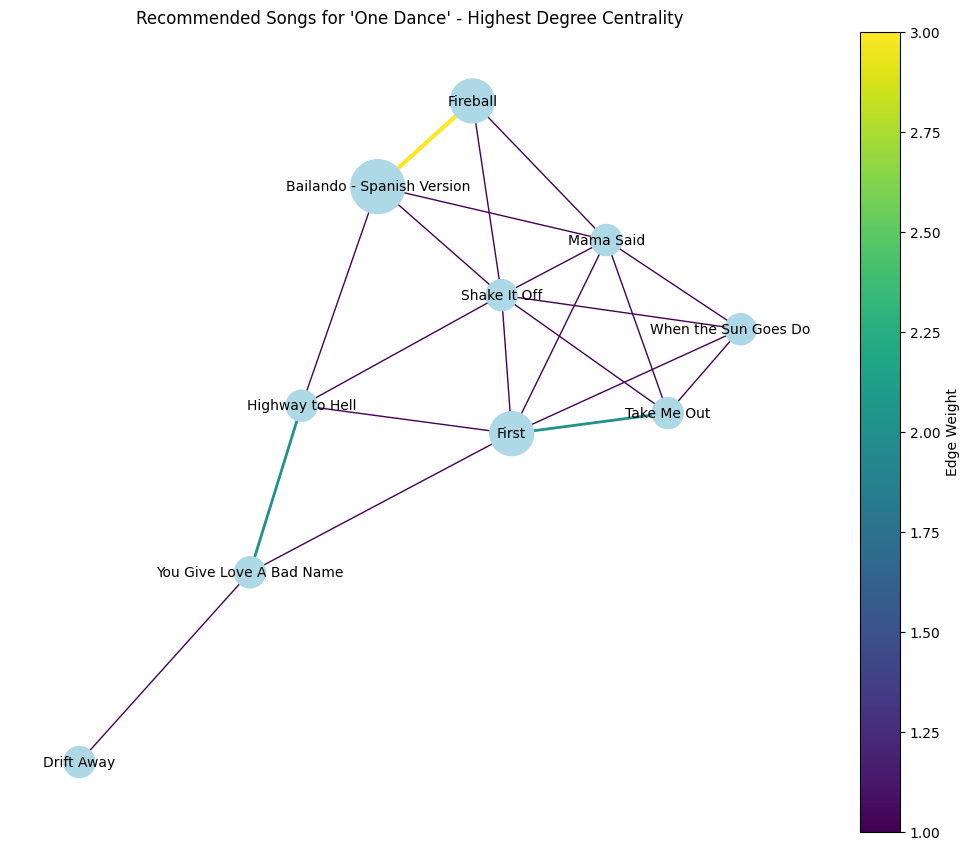

In [ ]:
# Create a new graph for visualization
visualization_graph = nx.Graph()

# Add nodes (recommended songs) to the visualization graph
for song_id, properties in co_high_recommended_songs.items():
    visualization_graph.add_node(song_id, name=properties['name'], weight=properties['weight'], common_playlists=properties['common_playlists'])

# Add edges between recommended songs based on their co-occurrence in playlists
for song_id, properties in co_high_recommended_songs.items():
    for neighbor_id in larger_graph.neighbors(song_id):
        if neighbor_id in co_high_recommended_songs:  # Only add edges between recommended songs
            weight = larger_graph[song_id][neighbor_id]['weight']
            visualization_graph.add_edge(song_id, neighbor_id, weight=weight)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(visualization_graph, seed=42)  # Specify the layout algorithm
edge_weights = [visualization_graph[u][v]['weight'] for u, v in visualization_graph.edges()]
node_weights = [properties['weight'] * 500 for properties in co_high_recommended_songs.values()]
nx.draw(visualization_graph, pos, labels={node: co_high_recommended_songs[node]['name'] for node in visualization_graph.nodes()},
        node_size=node_weights, node_color='lightblue', font_size=10, width=edge_weights, edge_color=edge_weights, edge_cmap=plt.cm.viridis)  # Using Viridis colormap
plt.title("Recommended Songs for 'One Dance' - Highest Degree Centrality")
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))  # Using Viridis colormap
sm.set_array([])
plt.colorbar(sm, label='Edge Weight')
plt.show()

<ipython-input-29-a9f9107e3185>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight')


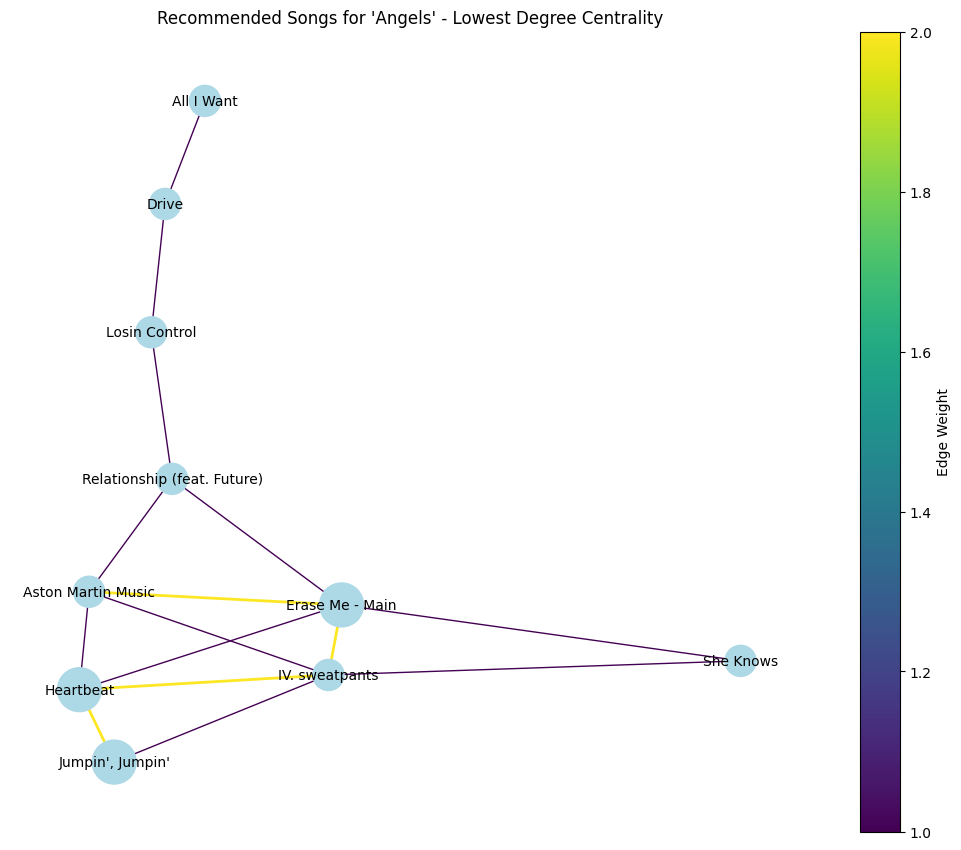

In [ ]:
# Create a new graph for visualization
visualization_graph = nx.Graph()

# Add nodes (recommended songs) to the visualization graph
for song_id, properties in co_low_recommended_songs.items():
    visualization_graph.add_node(song_id, name=properties['name'], weight=properties['weight'], common_playlists=properties['common_playlists'])

# Add edges between recommended songs based on their co-occurrence in playlists
for song_id, properties in co_low_recommended_songs.items():
    for neighbor_id in larger_graph.neighbors(song_id):
        if neighbor_id in co_low_recommended_songs:  # Only add edges between recommended songs
            weight = larger_graph[song_id][neighbor_id]['weight']
            visualization_graph.add_edge(song_id, neighbor_id, weight=weight)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(visualization_graph, seed=42)  # Specify the layout algorithm
edge_weights = [visualization_graph[u][v]['weight'] for u, v in visualization_graph.edges()]
node_weights = [properties['weight'] * 500 for properties in co_low_recommended_songs.values()]
nx.draw(visualization_graph, pos, labels={node: co_low_recommended_songs[node]['name'] for node in visualization_graph.nodes()},
        node_size=node_weights, node_color='lightblue', font_size=10, width=edge_weights, edge_color=edge_weights, edge_cmap=plt.cm.viridis)  # Using Viridis colormap
plt.title("Recommended Songs for 'Angels' - Lowest Degree Centrality")
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))  # Using Viridis colormap
sm.set_array([])
plt.colorbar(sm, label='Edge Weight')
plt.show()

In [ ]:
# Example usage
con_high_recommendations = recommend_songs(highest_degree_node, enriched_larger_graph, song_data)
if isinstance(con_high_recommendations, pd.DataFrame) and not con_high_recommendations.empty:
    # Print each song name and its similarity score
    for index, row in con_high_recommendations.iterrows():
        print(f"{row['song_name']}: Similarity Score {row['similarity_score']:.4f}")
else:
    print("No recommendations available or the input data was incorrect.")

Won't Go Home Without You: Similarity Score 0.9816
Faded: Similarity Score 0.9775
Once In a While: Similarity Score 0.9689
Body Language: Similarity Score 0.9684
Me, Myself & I: Similarity Score 0.9679
Most Girls: Similarity Score 0.9668
Want Her: Similarity Score 0.9633
Till I Die: Similarity Score 0.9602
Suit & Tie: Similarity Score 0.9585
Habits (Stay High): Similarity Score 0.9582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


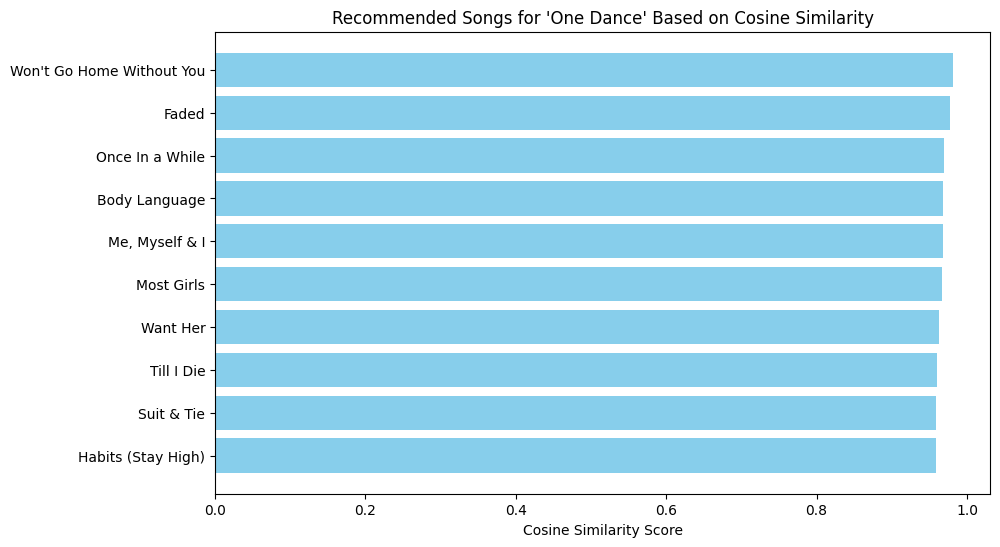

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_recommendations(recommendations):
    # Check if the recommendations DataFrame is empty or not provided
    if recommendations.empty:
        print("No recommendations to plot.")
        return

    # Set up the plotting environment
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['song_name'], recommendations['similarity_score'], color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.title("Recommended Songs for 'One Dance' Based on Cosine Similarity")
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
    plt.show()

recommendations = pd.DataFrame(con_high_recommendations)

# Plotting the recommendations
plot_recommendations(recommendations)


In [ ]:
# Example usage
con_low_recommendations = recommend_songs(lowest_degree_node, enriched_larger_graph, song_data)
if isinstance(con_low_recommendations, pd.DataFrame) and not con_low_recommendations.empty:
    # Print each song name and its similarity score
    for index, row in con_low_recommendations.iterrows():
        print(f"{row['song_name']}: Similarity Score {row['similarity_score']:.4f}")
else:
    print("No recommendations available or the input data was incorrect.")

Cherry Wine - Live: Similarity Score 0.9830
Coaster: Similarity Score 0.9807
One: Similarity Score 0.9758
Yesterday - Remastered: Similarity Score 0.9754
Can't Help Falling in Love: Similarity Score 0.9748
Latch - Acoustic: Similarity Score 0.9743
The Sounds of Silence - Acoustic Version: Similarity Score 0.9741
Come Away With Me: Similarity Score 0.9687
Liability: Similarity Score 0.9672
Sweet Creature: Similarity Score 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


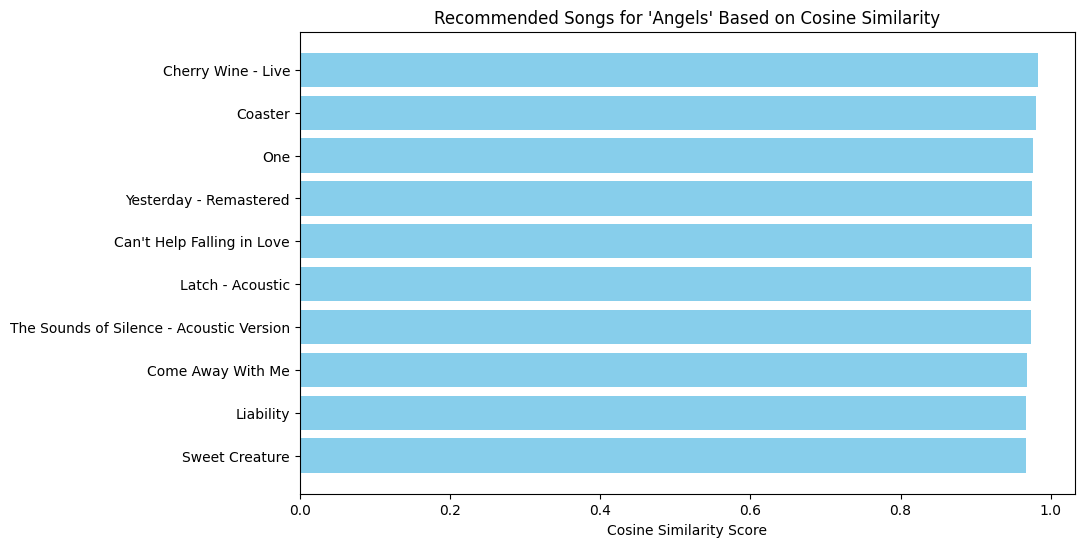

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_recommendations(recommendations):
    # Check if the recommendations DataFrame is empty or not provided
    if recommendations.empty:
        print("No recommendations to plot.")
        return

    # Set up the plotting environment
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['song_name'], recommendations['similarity_score'], color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.title("Recommended Songs for 'Angels' Based on Cosine Similarity")
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
    plt.show()

recommendations = pd.DataFrame(con_low_recommendations)

# Plotting the recommendations
plot_recommendations(recommendations)


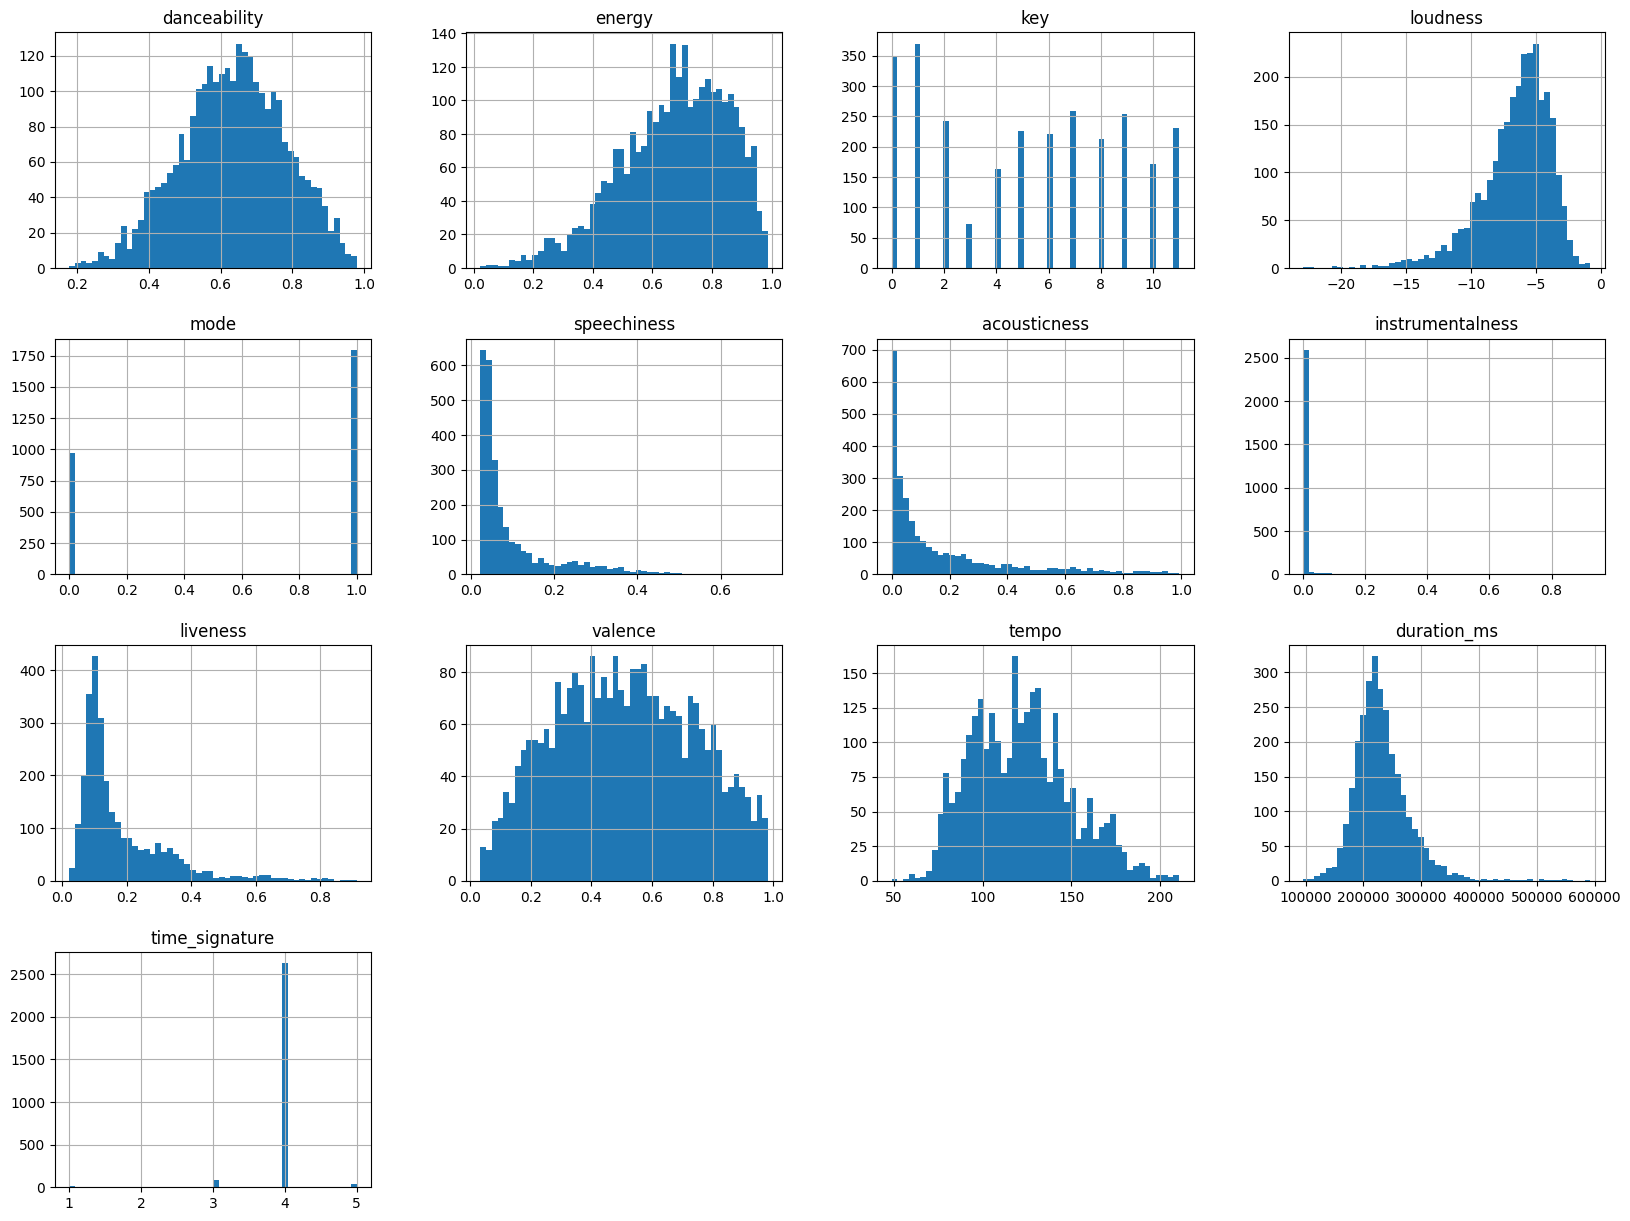

In [ ]:
features_df = extract_audio_features(enriched_larger_graph)  # Assuming this function pulls the correct features
features_df.hist(bins=50, figsize=(20,15))
plt.show()

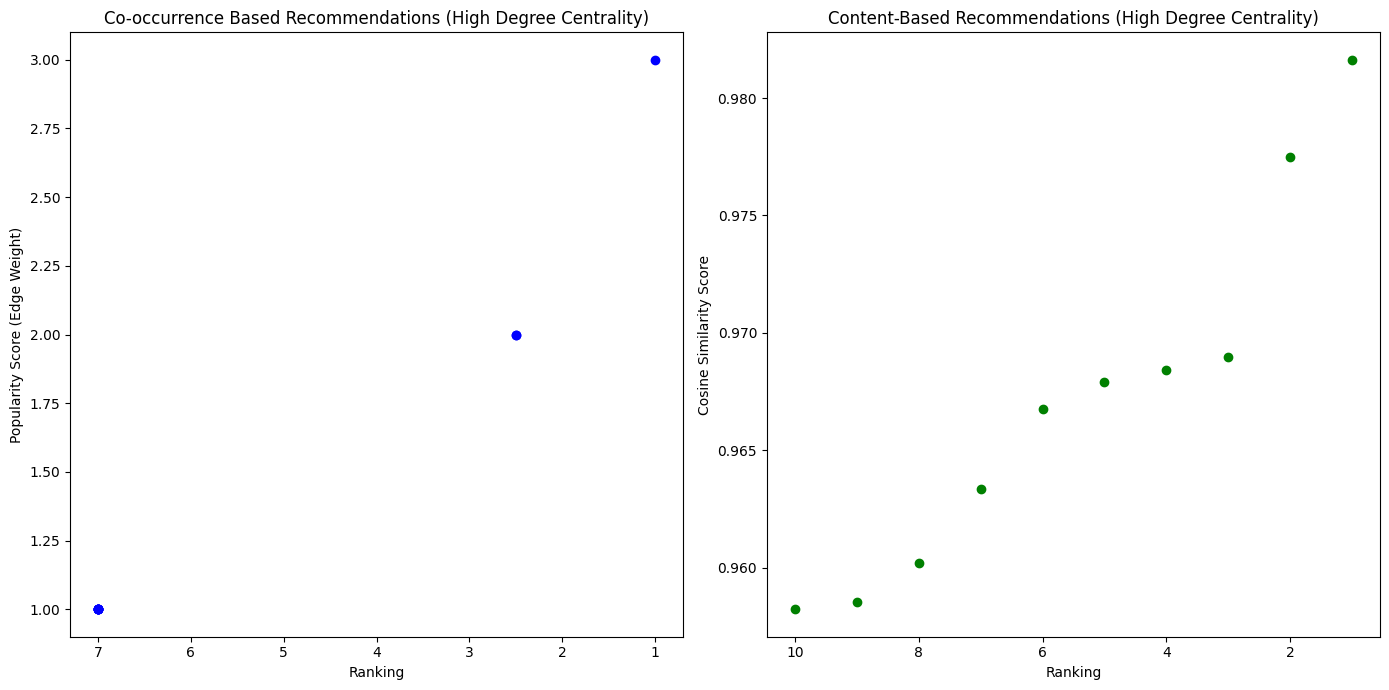

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Your co-occurrence and content-based recommendation functions should already be defined as provided above.

# Generate recommendations for a high-degree centrality node
high_degree_recommendations_co = co_high_recommended_songs
high_degree_recommendations_content = con_high_recommendations

# Create DataFrames from the recommendations
# Convert recommendations dict to DataFrame for co-occurrence
high_degree_co_df = pd.DataFrame(high_degree_recommendations_co).T.reset_index()
high_degree_co_df.columns = ['song_id', 'name', 'weight', 'common_playlists']
high_degree_co_df['ranking'] = high_degree_co_df['weight'].rank(ascending=False)

# Convert DataFrame for content-based
high_degree_content_df = high_degree_recommendations_content.reset_index(drop=True)
high_degree_content_df['ranking'] = high_degree_content_df['similarity_score'].rank(ascending=False)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for co-occurrence based recommendations
plt.subplot(1, 2, 1)
plt.scatter(high_degree_co_df['ranking'], high_degree_co_df['weight'], color='blue', label='Co-occurrence')
plt.title('Co-occurrence Based Recommendations (High Degree Centrality)')
plt.xlabel('Ranking')
plt.ylabel('Popularity Score (Edge Weight)')
plt.gca().invert_xaxis()  # Higher rankings to the left

# Plot for content-based recommendations
plt.subplot(1, 2, 2)
plt.scatter(high_degree_content_df['ranking'], high_degree_content_df['similarity_score'], color='green', label='Content-based')
plt.title('Content-Based Recommendations (High Degree Centrality)')
plt.xlabel('Ranking')
plt.ylabel('Cosine Similarity Score')
plt.gca().invert_xaxis()  # Higher rankings to the left

plt.tight_layout()
plt.show()


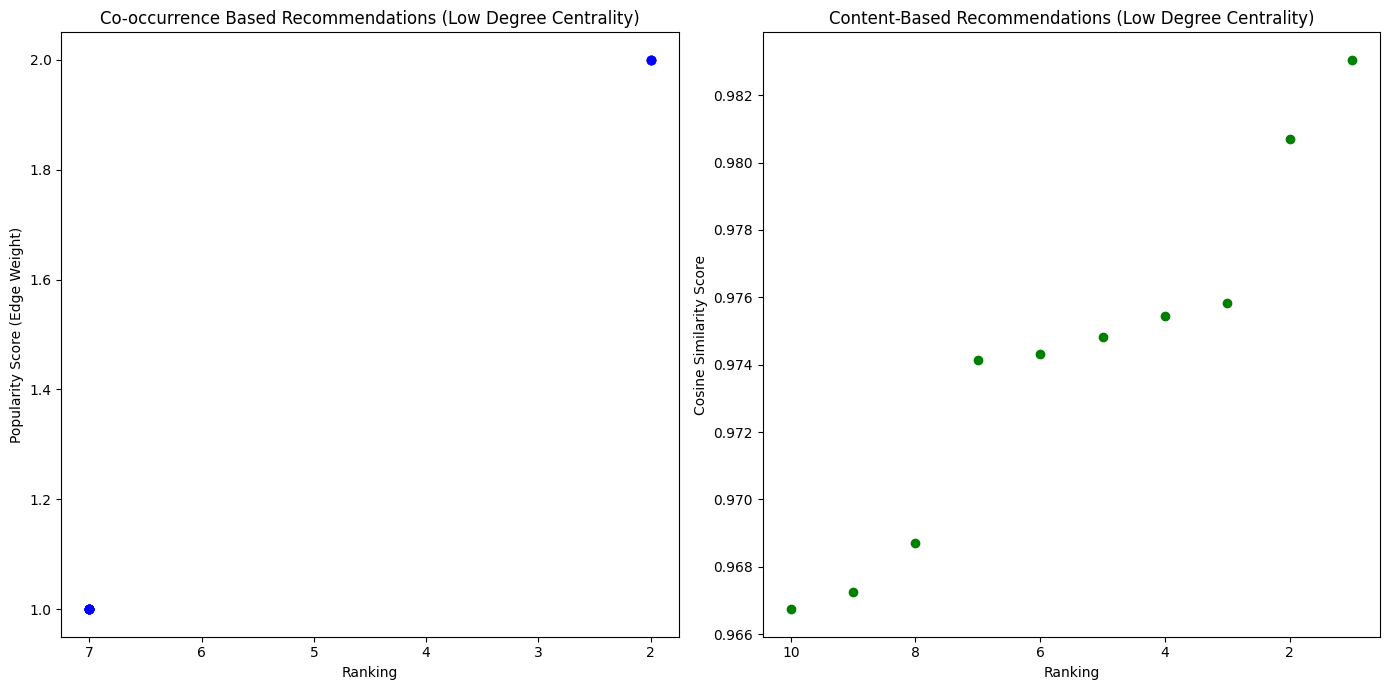

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Your co-occurrence and content-based recommendation functions should already be defined as provided above.

# Generate recommendations for a high-degree centrality node
high_degree_recommendations_co = co_low_recommended_songs
high_degree_recommendations_content = con_low_recommendations

# Create DataFrames from the recommendations
# Convert recommendations dict to DataFrame for co-occurrence
high_degree_co_df = pd.DataFrame(high_degree_recommendations_co).T.reset_index()
high_degree_co_df.columns = ['song_id', 'name', 'weight', 'common_playlists']
high_degree_co_df['ranking'] = high_degree_co_df['weight'].rank(ascending=False)

# Convert DataFrame for content-based
high_degree_content_df = high_degree_recommendations_content.reset_index(drop=True)
high_degree_content_df['ranking'] = high_degree_content_df['similarity_score'].rank(ascending=False)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for co-occurrence based recommendations
plt.subplot(1, 2, 1)
plt.scatter(high_degree_co_df['ranking'], high_degree_co_df['weight'], color='blue', label='Co-occurrence')
plt.title('Co-occurrence Based Recommendations (Low Degree Centrality)')
plt.xlabel('Ranking')
plt.ylabel('Popularity Score (Edge Weight)')
plt.gca().invert_xaxis()  # Higher rankings to the left

# Plot for content-based recommendations
plt.subplot(1, 2, 2)
plt.scatter(high_degree_content_df['ranking'], high_degree_content_df['similarity_score'], color='green', label='Content-based')
plt.title('Content-Based Recommendations (Low Degree Centrality)')
plt.xlabel('Ranking')
plt.ylabel('Cosine Similarity Score')
plt.gca().invert_xaxis()  # Higher rankings to the left

plt.tight_layout()
plt.show()
